In [3]:
from Composer import LiquidComposer
import mdtraj as md
import openmm
from openmm.app.pdbfile import PDBFile
import parmed

In [6]:
smiles = 'c1ccccc1'

In [12]:
def load_prmed(schema_id):
    pdb_file = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/{schema_id}_build_coordinates/output.pdb'
    parameterized_system = f'/localhome/cschiebroek/MDFP_VP/mdfptools/carl/{schema_id}_assign_parameters/system.xml'
    omm_top = PDBFile(pdb_file).topology
    omm_sys = openmm.XmlSerializer.deserialize(open(parameterized_system).read())
    rdk_pmd = parmed.openmm.load_topology(omm_top, omm_sys, xyz=pdb_file)
    return rdk_pmd
def load_traj(n):
    return md.load(f'test_benzene_full_equil_n{n}.h5')

In [13]:
rdk_pmd_100 = load_prmed('adb70b0f9c8b43a9a9373ada67a25377')
traj_100 = load_traj(100)
%time mdfp_100 = LiquidComposer.run(traj_100, rdk_pmd_100,smiles=smiles)

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


CPU times: user 529 ms, sys: 0 ns, total: 529 ms
Wall time: 407 ms


In [16]:
traj_256 = load_traj(256)
rdk_pmd_256 = load_prmed('f09a080a01674150b8116e28bfe506dc')
%time mdfp_256 = LiquidComposer.run(traj_256, rdk_pmd_256,smiles=smiles)

/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


CPU times: user 1.71 s, sys: 29.8 ms, total: 1.74 s
Wall time: 1.37 s


In [15]:
traj_1000 = load_traj(1000)
rdk_pmd_1000 = load_prmed('0071386446c342529f1bb7c14316c4e7')
%time mdfp_256 = LiquidComposer.run(traj_256, rdk_pmd_256,smiles=smiles)

CPU times: user 17 s, sys: 839 ms, total: 17.8 s
Wall time: 13.9 s


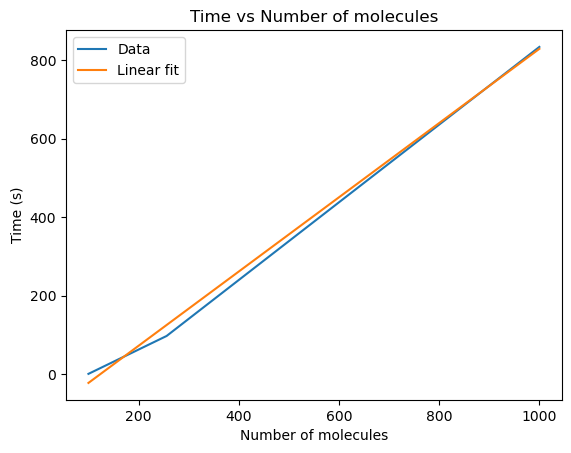

In [20]:
#plot time vs n
import matplotlib.pyplot as plt
timings = [0.4,97,13.9*60]
n = [100,256,1000]
plt.plot(n,timings)
plt.xlabel('Number of molecules')
plt.ylabel('Time (s)')
plt.title('Time vs Number of molecules')
#also plot linear fit
import numpy as np
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(n, timings)
plt.plot(n, np.array(n)*slope + intercept)
plt.legend(['Data','Linear fit'])
plt.show()

In [33]:
def solute_solvent_split(topology):
    solute_atoms = set()
    solvent_atoms = set()
    for atom in topology.atoms():
        if atom.residue.index == 0 :
            solute_atoms.add(atom.index)
        else:
            solvent_atoms.add(atom.index)
    return solute_atoms, solvent_atoms

solute_atoms, solvent_atoms = solute_solvent_split(rdk_pmd_100.topology)
print(len(solute_atoms), len(solvent_atoms))

12 1188


In [31]:
for atom in rdk_pmd_100.topology.atoms():
    print(atom.index, atom.residue.index, atom.residue.name)    

0 0 BRO
1 0 BRO
2 0 BRO
3 0 BRO
4 0 BRO
5 0 BRO
6 0 BRO
7 0 BRO
8 0 BRO
9 0 BRO
10 0 BRO
11 0 BRO
12 1 BRO
13 1 BRO
14 1 BRO
15 1 BRO
16 1 BRO
17 1 BRO
18 1 BRO
19 1 BRO
20 1 BRO
21 1 BRO
22 1 BRO
23 1 BRO
24 2 BRO
25 2 BRO
26 2 BRO
27 2 BRO
28 2 BRO
29 2 BRO
30 2 BRO
31 2 BRO
32 2 BRO
33 2 BRO
34 2 BRO
35 2 BRO
36 3 BRO
37 3 BRO
38 3 BRO
39 3 BRO
40 3 BRO
41 3 BRO
42 3 BRO
43 3 BRO
44 3 BRO
45 3 BRO
46 3 BRO
47 3 BRO
48 4 BRO
49 4 BRO
50 4 BRO
51 4 BRO
52 4 BRO
53 4 BRO
54 4 BRO
55 4 BRO
56 4 BRO
57 4 BRO
58 4 BRO
59 4 BRO
60 5 BRO
61 5 BRO
62 5 BRO
63 5 BRO
64 5 BRO
65 5 BRO
66 5 BRO
67 5 BRO
68 5 BRO
69 5 BRO
70 5 BRO
71 5 BRO
72 6 BRO
73 6 BRO
74 6 BRO
75 6 BRO
76 6 BRO
77 6 BRO
78 6 BRO
79 6 BRO
80 6 BRO
81 6 BRO
82 6 BRO
83 6 BRO
84 7 BRO
85 7 BRO
86 7 BRO
87 7 BRO
88 7 BRO
89 7 BRO
90 7 BRO
91 7 BRO
92 7 BRO
93 7 BRO
94 7 BRO
95 7 BRO
96 8 BRO
97 8 BRO
98 8 BRO
99 8 BRO
100 8 BRO
101 8 BRO
102 8 BRO
103 8 BRO
104 8 BRO
105 8 BRO
106 8 BRO
107 8 BRO
108 9 BRO
109 9 BRO
110 9 BRO


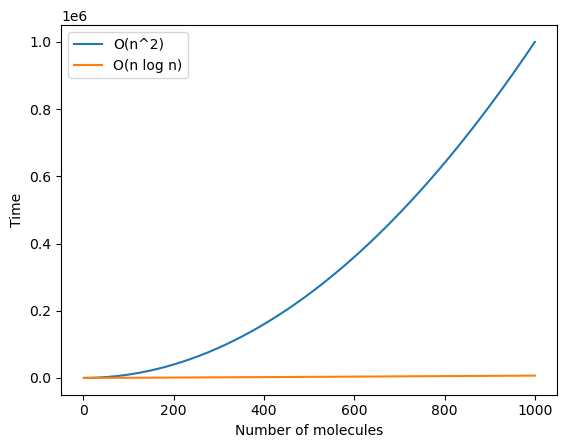

In [34]:
#plot O(n^2) vs O(n log n) for n in range 1 to 1000
n = np.arange(1,1001)
plt.plot(n,n**2,label='O(n^2)')
plt.plot(n,n*np.log(n),label='O(n log n)')
plt.xlabel('Number of molecules')
plt.ylabel('Time')
plt.legend()


In [37]:
import mdtraj as md 
traj = md.load('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/test_chloroform_baseline_d062.h5')
traj

<mdtraj.Trajectory with 5 frames, 500 atoms, 100 residues, and unitcells at 0x7449e765f750>

In [38]:
#save the trajectory as .dcd
traj.save_dcd('test_chloroform_baseline_d062.dcd')